In [19]:
import torch
print(torch.__version__)

2.6.0+cpu


In [20]:
if torch.cuda.is_available():
  device="cuda"
elif torch.backends.mps.is_available():
  device="mac"
else:
  device="cpu"
print(f"My device is {device}")

My device is cpu


In [21]:
m=0.7
c=0.4
# add one more dimension 1D-> 2D
X= torch.arange(0,1,0.02).unsqueeze(dim=1)

y=m*X +c
print(f"Shape of X is {X.shape}")
print(f"Shape of y is {y.shape}")
print(f"type of X is {type(X)}")
print(f"type of y is {type(y)}")

Shape of X is torch.Size([50, 1])
Shape of y is torch.Size([50, 1])
type of X is <class 'torch.Tensor'>
type of y is <class 'torch.Tensor'>


In [22]:
X[:5], y[:5]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800]]),
 tensor([[0.4000],
         [0.4140],
         [0.4280],
         [0.4420],
         [0.4560]]))

In [23]:
from sklearn.model_selection import train_test_split


In [24]:
#reproduicibility random state
X_train, X_test,y_train,y_test=train_test_split(X,y, test_size=0.2,random_state=42)

In [25]:
import matplotlib.pyplot as plt

def plot_data(X_train=X_train,X_test=X_test,y_train=y_train,y_test=y_test, predictions= None):
    plt.figure(figsize=(8,6))
    plt.scatter(X_train, y_train, s=10,c='b',label="Training data")
    plt.scatter(X_test, y_test, s=10,c='r',label="Testing data")
    if predictions is not None:
      plt.scatter(X_test,predictions,s=10,c='g',label="Predicted Data")
    plt.legend()
    plt.title("X vs Y")
    plt.show()


In [26]:
X_test.shape

torch.Size([10, 1])

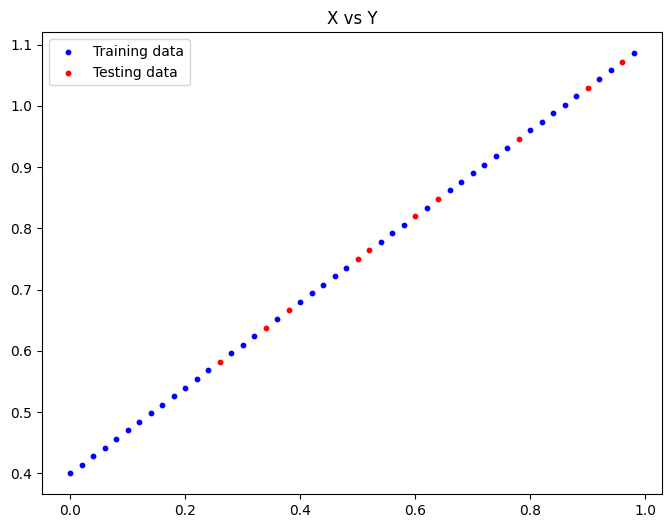

In [27]:
plot_data()

In [28]:
from torch import nn
class FirstNeuralNetwork(nn.Module): # extending nn.Module
  def __init__(self):
    super().__init__()
    self.weights= nn.Parameter(torch.randn(1,dtype=torch.float,requires_grad=True))
    self.bias= nn.Parameter(torch.randn(1,dtype=torch.float,requires_grad=True))

  def forward(self,x: torch.Tensor)->torch.tensor:
    return self.weights*x+self.bias


In [29]:
torch.manual_seed(42)
model=FirstNeuralNetwork()
list(model.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [30]:
with torch.inference_mode():
  y_preds=model(X_test)


In [31]:
y_preds.shape

torch.Size([10, 1])

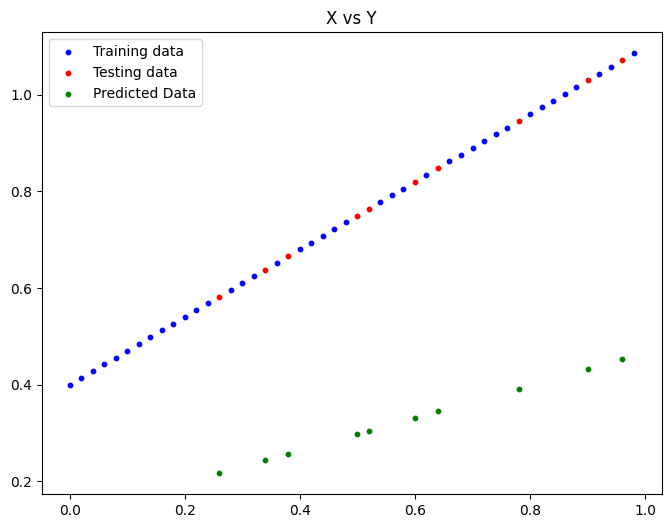

In [32]:

plot_data(predictions=y_preds)


In [33]:
#setup loss function and optimizer

loss_fn= nn.MSELoss()
#lr : learning rate
optimizer= torch.optim.SGD(params=model.parameters(),lr=0.1)
epochs= 500
X_train,y_train = X_train.to(device),y_train.to(device)
X_test,y_test = X_test.to(device),y_test.to(device)

model.to(device)
train_loss_list=[]
test_loss_list=[]

for epoch in range(epochs):
  #train
  model.train()
  # forward pass
  train_preds= model(X_train)
  #compute training loss
  train_loss= loss_fn(y_train,train_preds)
  #zero grad optimizer
  optimizer.zero_grad()
  #backpropagte
  train_loss.backward()
  #step to optimizer
  optimizer.step()


  with torch.inference_mode():
    test_preds=model(X_test)
    test_loss=loss_fn(y_test,test_preds)

  if(epoch+1)%20==0:
    print(f"Epoch:{epoch+1} | Train loss= {test_loss:.4f} | test loss= {test_loss:.4f}")

  test_loss_list.append(train_loss.cpu().detach().numpy())
  train_loss_list.append(test_loss.cpu().detach().numpy())



Epoch:20 | Train loss= 0.0011 | test loss= 0.0011
Epoch:40 | Train loss= 0.0006 | test loss= 0.0006
Epoch:60 | Train loss= 0.0003 | test loss= 0.0003
Epoch:80 | Train loss= 0.0002 | test loss= 0.0002
Epoch:100 | Train loss= 0.0001 | test loss= 0.0001
Epoch:120 | Train loss= 0.0001 | test loss= 0.0001
Epoch:140 | Train loss= 0.0000 | test loss= 0.0000
Epoch:160 | Train loss= 0.0000 | test loss= 0.0000
Epoch:180 | Train loss= 0.0000 | test loss= 0.0000
Epoch:200 | Train loss= 0.0000 | test loss= 0.0000
Epoch:220 | Train loss= 0.0000 | test loss= 0.0000
Epoch:240 | Train loss= 0.0000 | test loss= 0.0000
Epoch:260 | Train loss= 0.0000 | test loss= 0.0000
Epoch:280 | Train loss= 0.0000 | test loss= 0.0000
Epoch:300 | Train loss= 0.0000 | test loss= 0.0000
Epoch:320 | Train loss= 0.0000 | test loss= 0.0000
Epoch:340 | Train loss= 0.0000 | test loss= 0.0000
Epoch:360 | Train loss= 0.0000 | test loss= 0.0000
Epoch:380 | Train loss= 0.0000 | test loss= 0.0000
Epoch:400 | Train loss= 0.0000 | te

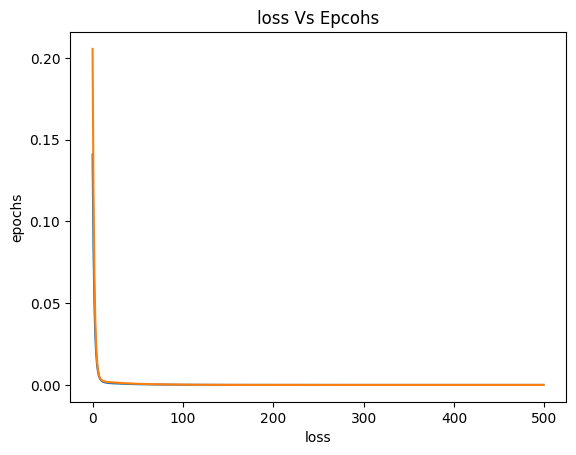

<Figure size 640x480 with 0 Axes>

In [34]:
plt.plot(range(epochs),train_loss_list,label="Training loss")
plt.plot(range(epochs),test_loss_list,label="Testing loss")
plt.title("loss Vs Epcohs")
plt.xlabel("loss")
plt.ylabel("epochs")
plt.show()
plt.savefig("loss.png")

In [35]:
#saving pytorch model

torch.save(obj=model.state_dict(),f='model.pth')
print("Success")

Success
